In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

           symbol       close       volume
date                                      
2010-01-04   AAPL  214.009998  123432400.0
2010-01-04    ABT   54.459951   10829000.0
2010-01-04    AIG   29.889999    7750900.0
2010-01-04   AMAT   14.300000   18615100.0
2010-01-04   ARNC   16.650013   11512100.0


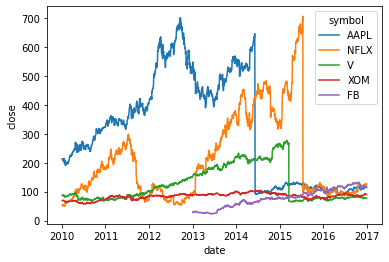

In [14]:
# Read in the data
data = pd.read_csv('https://assets.datacamp.com/production/repositories/1536/datasets/43d325fa67cde1d4d5de62adc108fceabaddf3cc/prices.csv', index_col=0)

# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
print(data.head())
#select a few stocks
stocks=['AAPL','FB','NFLX','XOM','V']
best_stocks=data[data.symbol.isin(stocks)]

# Loop through each column, plot its values over time
sns.lineplot(data=best_stocks,x='date',y='close',hue='symbol')
plt.show()

In [15]:
ebay_values=data[data['symbol']=='EBAY']
ebay_values=ebay_values.close
nvda_values=data[data['symbol']=='NVDA']
nvda_values=nvda_values.close
yhoo_values=data[data['symbol']=='YHOO']
yhoo_values=yhoo_values.close

prices_merged={'EBAY':ebay_values,'NVDA':nvda_values,'YHOO':yhoo_values}
X=pd.DataFrame(data=prices_merged)

aapl_values=data[data['symbol']=='AAPL']
y=aapl_values.close
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X,y, cv=5)
print(scores)

[-3.79519169e+00  6.88754904e-02 -9.39666910e+00 -1.71517506e+00
 -3.28621454e+03]


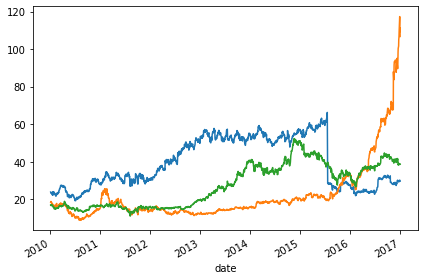

EBAY    0
NVDA    0
YHOO    0
dtype: int64


In [16]:

prices=X

# Visualize the dataset
prices.plot(legend=False)
plt.tight_layout()
plt.show()

# Count the missing values of each time series
missing_values = prices.isna().sum()
print(missing_values)

## en caso de tener valores perdidos, hacer lo siguiente


In [17]:
# Create a function we'll use to interpolate and plot
def interpolate_and_plot(prices, interpolation):

    # Create a boolean mask for missing values
    missing_values = prices.isna()

    # Interpolate the missing values
    prices_interp = prices.interpolate(interpolation)

    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(10, 5))
    prices_interp.plot(color='k', alpha=.6, ax=ax, legend=False)
    
    # Now plot the interpolated values on top in red
    prices_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
    plt.show()

## no pasara nada con los graficos pq no hay valores perdidos 

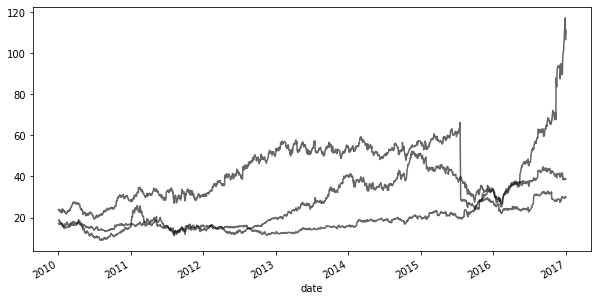

In [18]:
# Interpolate using the latest non-missing value
interpolation_type = 'zero'
interpolate_and_plot(prices, interpolation_type)

In [ ]:
# Interpolate linearly
interpolation_type = 'linear'
interpolate_and_plot(prices, interpolation_type)

In [ ]:
# Interpolate with a quadratic function
interpolation_type = 'quadratic'
interpolate_and_plot(prices, interpolation_type)

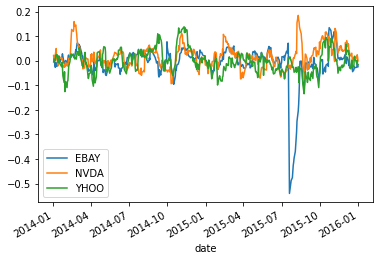

In [20]:
# Your custom function
def percent_change(values):
    # Collect all *but* the last value of this window, then the final value
    previous_values = values[:-1]
    last_value = values[-1]

    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

# Apply your custom function and plot
prices_perc = prices.rolling(20).apply(percent_change)
prices_perc.loc["2014":"2015"].plot()
plt.show()

What happened to EBAY in 2015? 

Ebay used to own PayPal, but the two business were splited in the hopes that they will be able to operate better separately. Hence the ~50% loss of value in Ebay. If you owned Ebay shares, you should be receiving the same number PayPal shares.

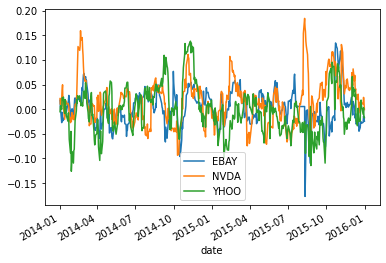

In [21]:
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
    # Calculate a mask for the differences that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median accross the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing function to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc["2014":"2015"].plot()
plt.show()

# arreglar X e y

In [19]:
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score

# Split our data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.8, shuffle=False, random_state=1)
# Fit our model and generate predictions
#model = Ridge()
#model.fit(X_train,y_train)
#predictions = model.predict(X_test)
#score = r2_score(y_test, predictions)
#print(score)

# Visualize our predictions along with the "true" values, and print the score
#fig, ax = plt.subplots(figsize=(15, 5))
#ax.plot(y_test, color='k', lw=3)
#ax.plot(predictions, color='r', lw=2)
#plt.show()